In [32]:
using Flux, Flux.Data.MNIST
using Flux: onehotbatch, argmax, crossentropy, throttle
using Base.Iterators: repeated
using Images

┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data C:\Users\kgtrm\.julia\packages\Flux\qp1gc\src\data\Data.jl:17


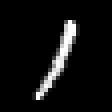

In [33]:
imgs = MNIST.images()
colorview(Gray, imgs[100])

In [34]:
typeof(imgs[3])

Matrix{Gray{N0f8}} (alias for Array{Gray{Normed{UInt8, 8}}, 2})

In [35]:
myFloat32(X) = Float32.(X)
fpt_imgs = myFloat32.(imgs)

60000-element Vector{Matrix{Float32}}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0

In [36]:
typeof(fpt_imgs[3])

Matrix{Float32} (alias for Array{Float32, 2})

In [37]:
vectorize(x) = x[:]
vectorized_imgs = vectorize.(fpt_imgs);

In [38]:
typeof(vectorized_imgs)

Vector{Vector{Float32}} (alias for Array{Array{Float32, 1}, 1})

In [39]:
X = hcat(vectorized_imgs...)
size(X)
typeof(X)

Matrix{Float32} (alias for Array{Float32, 2})

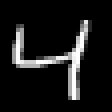

In [12]:
onefigure = X[:,3]
t1 = reshape(onefigure, 28, 28)
colorview(Gray,t1)

In [15]:
labels = MNIST.labels()
labels[1]

┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data C:\Users\kgtrm\.julia\packages\Flux\qp1gc\src\data\Data.jl:17


5

In [16]:
Y = onehotbatch(labels, 0:9)

10×60000 Flux.OneHotArray{10,2,Vector{UInt32}}:
 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  1  1  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  1  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [17]:
m = Chain(
    Dense(28^2, 32, relu),
    Dense(32, 10),
    softmax)

Chain(Dense(784, 32, relu), Dense(32, 10), softmax)

In [18]:
m(onefigure)

10-element Vector{Float32}:
 0.074186414
 0.08303242
 0.11384709
 0.08417934
 0.06126133
 0.0812228
 0.14878754
 0.12875769
 0.11217974
 0.11254566

In [19]:
loss(x,y) = Flux.crossentropy(m(x),y)
accuracy(x,y) = mean(argmax(m(x)) .== argmax(y))

accuracy (generic function with 1 method)

In [20]:
datasetx = repeated((X,Y),200)
C = collect(datasetx);

In [21]:
evalcb = () -> @show(loss(X,Y))

#1 (generic function with 1 method)

In [22]:
ps = Flux.params(m)

Params([Float32[-0.07588536 -0.03257544 … 0.004119736 0.058176473; -0.00780722 0.030459257 … 0.057031002 -0.06781944; … ; -0.062742464 -0.03308695 … -0.08475307 -0.061703447; -0.005699727 0.05089326 … -0.036439132 0.0118583245], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], Float32[-0.18385431 -0.25803414 … -0.14941409 0.3495918; 0.25414187 0.18598956 … -0.2355596 0.09851262; … ; -0.2629968 0.37339255 … 0.24329181 -0.20693992; -0.27629724 0.021316858 … 0.11545824 -0.20214848], Float32[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])

In [40]:
?Flux.train!

```
train!(loss, params, data, opt; cb)
```

For each datapoint `d` in `data`, compute the gradient of  `loss` with respect to `params` through backpropagation and call the optimizer `opt`.

If `d` is a tuple of arguments to `loss` call `loss(d...)`, else call `loss(d)`.

A callback is given with the keyword argument `cb`. For example, this will print "training" every 10 seconds (using [`Flux.throttle`](@ref)):     train!(loss, params, data, opt, cb = throttle(() -> println("training"), 10))

The callback can call [`Flux.stop`](@ref) to interrupt the training loop.

Multiple optimisers and callbacks can be passed to `opt` and `cb` as arrays.


In [24]:
opt = ADAM()
Flux.train!(loss, ps, datasetx, opt, cb = throttle(evalcb, 10))

loss(X, Y) = 2.2990294f0
loss(X, Y) = 0.8466989f0
loss(X, Y) = 0.48245755f0
loss(X, Y) = 0.38176432f0
loss(X, Y) = 0.33194473f0
loss(X, Y) = 0.30025086f0


In [26]:
tX = hcat(float.(reshape.(MNIST.images(:test), :))...);
test_image = m(tX[:,1])

┌ Warning: Flux's datasets are deprecated, please use the package MLDatasets.jl
└ @ Flux.Data C:\Users\kgtrm\.julia\packages\Flux\qp1gc\src\data\Data.jl:17


10-element Vector{Float32}:
 0.000121093035
 1.2300442f-6
 0.00061725563
 0.0041754316
 2.5121658f-6
 9.9825236f-5
 1.0913808f-5
 0.9939615
 0.00010839959
 0.00090183597

In [27]:
argmax(test_image) - 1

7

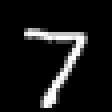

In [28]:
t1 = reshape(tX[:, 1], 28,28)
colorview(Gray, t1)

In [29]:
onefigure = X[:, 2]
m(onefigure)

10-element Vector{Float32}:
 0.9988657
 7.268741f-8
 4.4366174f-5
 0.00010152662
 1.4048784f-7
 0.00066734117
 0.00013446463
 6.0309518f-5
 0.000100867175
 2.5296353f-5

In [30]:
Y[:,2]

10-element Flux.OneHotVector{10,UInt32}:
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0